<a href="https://colab.research.google.com/github/prannavk/Ads-Campaign-Data-ML-Project/blob/master/svmepk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
print("Fetching csv from Local...")
from google.colab import files
upload = files.upload()

Fetching csv from Local...


In [51]:
adsdf = pd.read_csv("Platform_Ads_Insights.csv")
# Previewing the first 7 records of the selected dataset
adsdf.head(7)

,UIDs,Utag,Gender,Age,EstimatedSalary,Purchased,ImpressionTimeMin
0,15624510,alexis97,Male,19,19000,0,2
1,15810944,my42javs,Male,35,20000,0,3
2,15668575,seso1,Female,26,43000,0,3
3,15603246,dollas69,Female,27,57000,0,4
4,15804002,serrainvincible32,Male,19,76000,0,8
5,15728773,skiesuring332,Male,27,58000,0,9
6,15598044,anurag22,Female,27,84000,0,1


In [52]:
# Checking Value Counts of the ImpressionTimeMin (Decimal) and Purchased (Binary) Attributes
adsdf['ImpressionTimeMin'].value_counts()

3     166
2      97
4      57
5      31
7      11
6      10
8       8
9       8
1       8
17      1
25      1
28      1
21      1
Name: ImpressionTimeMin, dtype: int64

In [53]:
adsdf['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

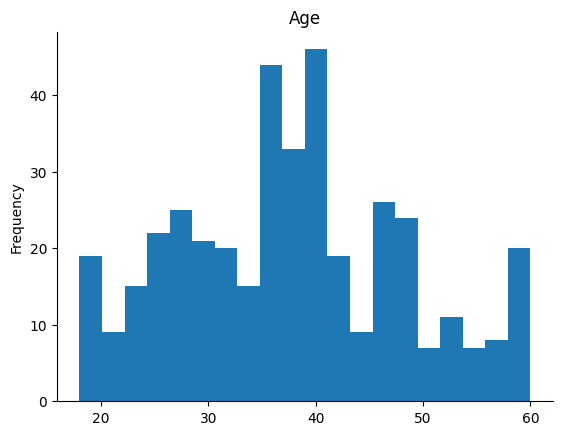

In [54]:
# Users Age Insights based on Age Histogram

adsdf['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

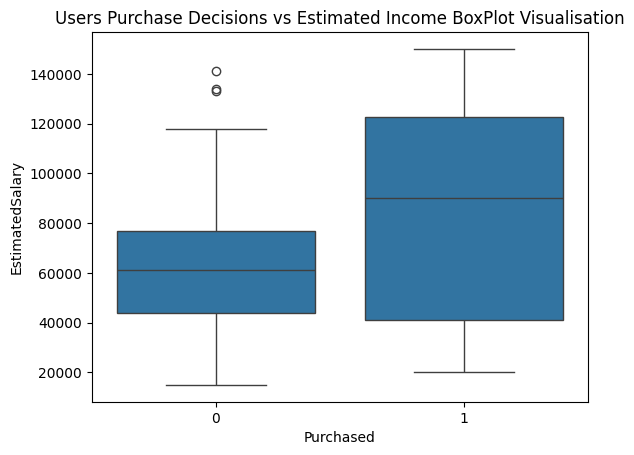

In [55]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=adsdf)
plt.title('Users Purchase Decisions vs Estimated Income BoxPlot Visualisation')
plt.show()

In [56]:
X = adsdf.iloc[:, [3, 4]].values
Y = adsdf.iloc[:, 5].values
Zd = adsdf.iloc[:, 6].values

In [ ]:
X[:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [ ]:
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
Zd[:10]

array([2, 3, 3, 4, 8, 9, 1, 2, 2, 3])

In [57]:
# Train and Test Data Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [58]:
x_train[:10], 'x train and x test', x_test[:10]

(array([[    58, 144000],
        [    59,  83000],
        [    24,  55000],
        [    26,  35000],
        [    58,  38000],
        [    42,  80000],
        [    40,  75000],
        [    59, 130000],
        [    46,  41000],
        [    41,  60000]]),
 'x train and x test',
 array([[    30,  87000],
        [    38,  50000],
        [    35,  75000],
        [    30,  79000],
        [    35,  50000],
        [    27,  20000],
        [    31,  15000],
        [    36, 144000],
        [    18,  68000],
        [    47,  43000]]))

In [59]:
y_train[:10], 'y train and y test', y_test[:10]

(array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0]),
 'y train and y test',
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [60]:
# Lets Standardize

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sX_train = sc.fit_transform(x_train)
sX_test = sc.transform(x_test)

In [ ]:
# Support Vector Classification
from sklearn.svm import SVC

# linear function kernel classifier
classifier1 = SVC(break_ties=False,
                 cache_size=200,
                 class_weight=None,
                 coef0=0.0,
                 decision_function_shape='ovr',
                 degree=3, gamma='scale',
                 kernel='linear',
                 max_iter=-1,
                 probability=False,
                 random_state=0,
                 shrinking=True)
classifier1.fit(sX_train, y_train)


SVC(kernel='linear', random_state=0)

In [ ]:
# Radial Basis function kernel classifier
classifier2 = SVC(break_ties=False,
                  cache_size=200,
                  class_weight=None,
                  coef0=0.0,
                  decision_function_shape='ovr',
                  degree=3, gamma='scale',
                  kernel='rbf',
                  max_iter=-1,
                  probability=False,
                  random_state=0,
                  shrinking=True)
classifier2.fit(sX_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred1 = classifier1.predict(sX_test)

In [ ]:
y_pred2 = classifier2.predict(sX_test)

In [ ]:
# Confusion Matrices for both

from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,y_pred1)
print(f'using linear kernel f: \n{cm1}')

cm2=confusion_matrix(y_test,y_pred2)
print(f'using radial basis kernel f: \n{cm2}')

using linear kernel f: 
[[57  1]
 [ 6 16]]
using radial basis kernel f: 
[[55  3]
 [ 1 21]]


In [ ]:
# Test Classification Report and Train Classification Report

from sklearn.metrics import classification_report

cr1 = classification_report(y_test, y_pred1)
cr2 = classification_report(y_test, y_pred2)

print(f'------------Test performance 1-------------\n {cr1} \n\n')
print(f'------------Test performance 2-------------\n {cr2} \n\n')

------------Test performance 1-------------
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80
 


------------Test performance 2-------------
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80
 




In [ ]:
cpxt = classifier1.predict(sX_train)

In [ ]:
print(classification_report(y_train, cpxt))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       199
           1       0.82      0.68      0.74       121

    accuracy                           0.82       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.82      0.82      0.82       320



In [61]:
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
# Lets Visualise the training Set Results

# Defining the mesh grid
h = 0.01  # Step size in the mesh
X_set, Y_set = sX_train, y_train
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<ipython-input-29-38b3756f8183>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


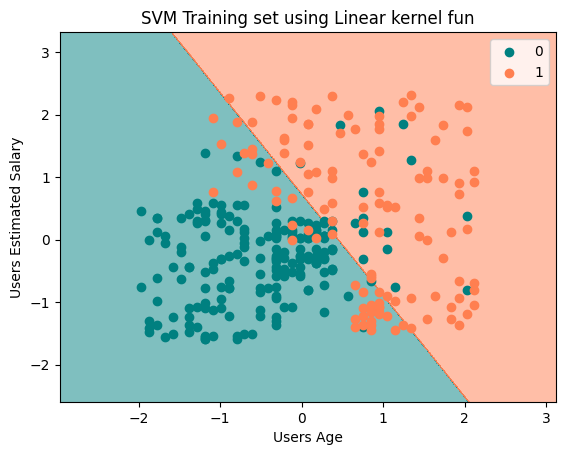

In [ ]:
## Using Classifier 1 (Linear F) on train set
# Make predictions on the mesh grid
Z = classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(('teal', 'coral')))

# Plot the training points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('teal', 'coral'))(i), label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Training set using Linear kernel fun')
plt.xlabel('Users Age')
plt.ylabel('Users Estimated Salary')
plt.legend()
plt.show()

<ipython-input-30-0844a551dd2a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


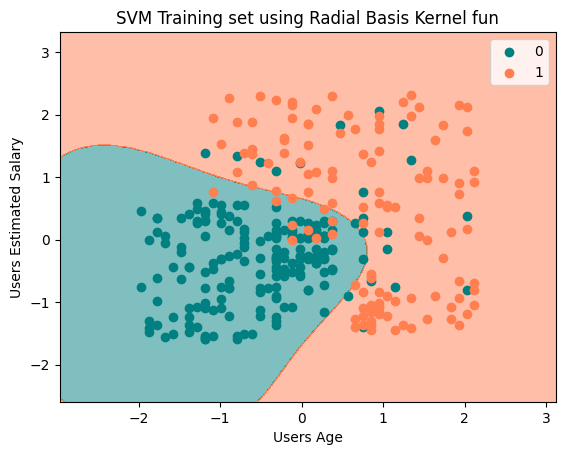

In [ ]:
## Using Classifier 2 (Radial Basis F) on train set
# Make predictions on the mesh grid
Z2 = classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z2, alpha=0.5, cmap=ListedColormap(('teal', 'coral')))

# Plot the training points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('teal', 'coral'))(i), label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Training set using Radial Basis Kernel fun')
plt.xlabel('Users Age')
plt.ylabel('Users Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Lets Visualise the test Set Results

# Defining the mesh grid
h = 0.01  # Step size in the mesh
X_set, Y_set = sX_test, y_test
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<ipython-input-32-6e2d904890d7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


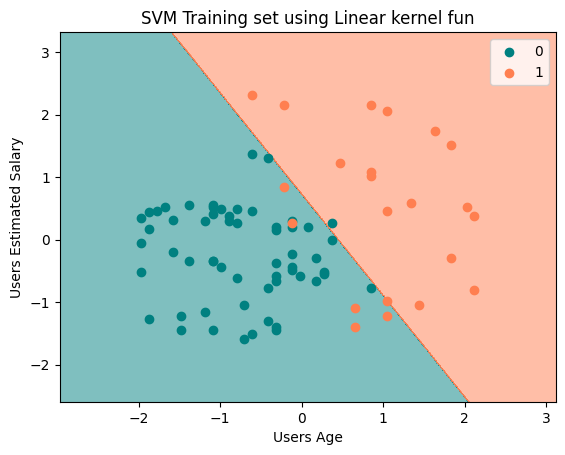

In [ ]:
## Using Classifier 1 (Linear F) on test set
# Make predictions on the mesh grid
Za = classifier1.predict(np.c_[xx.ravel(), yy.ravel()])
Za = Za.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Za, alpha=0.5, cmap=ListedColormap(('teal', 'coral')))

# Plot the training points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('teal', 'coral'))(i), label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Training set using Linear kernel fun')
plt.xlabel('Users Age')
plt.ylabel('Users Estimated Salary')
plt.legend()
plt.show()

<ipython-input-33-f72d5fcf45ba>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


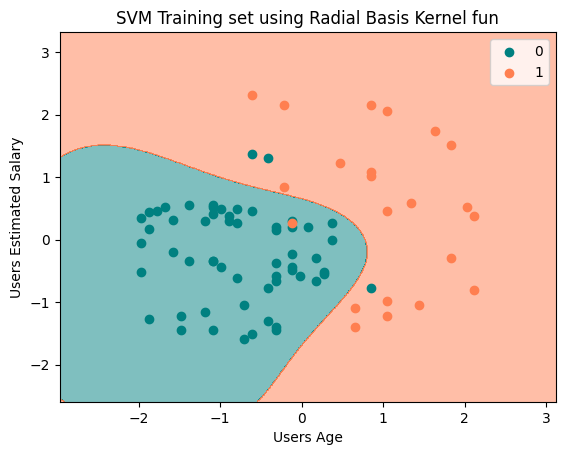

In [ ]:
## Using Classifier 2 (Radial Basis F) on test set
# Make predictions on the mesh grid
Zb = classifier2.predict(np.c_[xx.ravel(), yy.ravel()])
Zb = Zb.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Zb, alpha=0.5, cmap=ListedColormap(('teal', 'coral')))

# Plot the training points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('teal', 'coral'))(i), label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Training set using Radial Basis Kernel fun')
plt.xlabel('Users Age')
plt.ylabel('Users Estimated Salary')
plt.legend()
plt.show()

In [ ]:
print(classifier1) # used linear fun

SVC(kernel='linear', random_state=0)


In [ ]:
print(classifier2) # used radial basis fun for kernel

SVC(random_state=0)


In [15]:
# Work on the impression time data

xtrain, xtest, ztrain, ztest = train_test_split(X, Zd, test_size=0.2, random_state=42)

In [16]:
# Using Linear Regression for Decimal Domain Data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(xtrain, ztrain)

LinearRegression()

In [19]:
zPred = model.predict(xtest)

In [20]:
# Coefficients and Intercept for the Linear Regression

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-1.49113297e-02 -3.55176865e-06]
Intercept: 4.467467755776631


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ztest, zPred)
r2 = r2_score(ztest, zPred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2.9271252982914815
R^2 Score: -0.009571131120148735


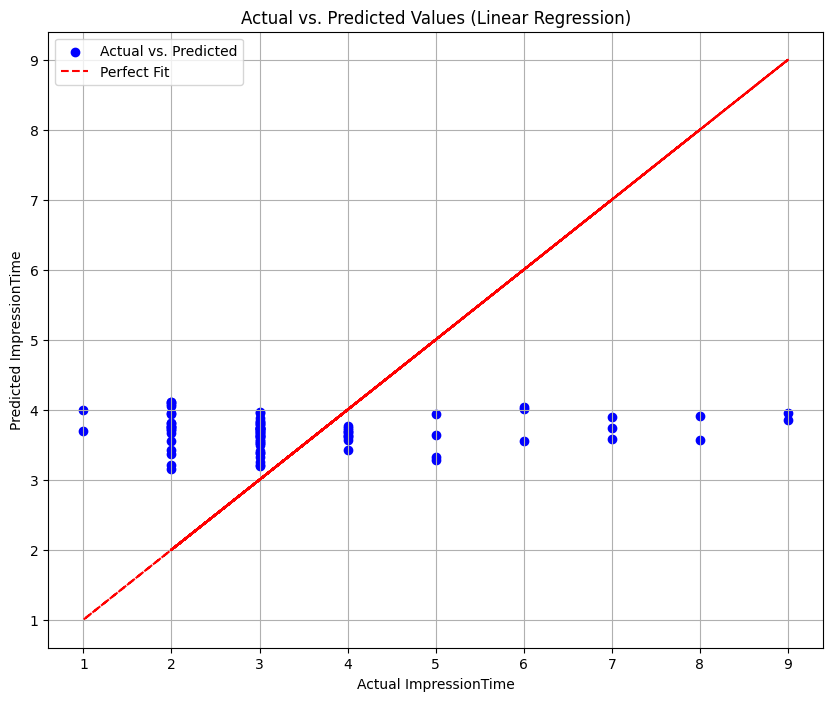

In [77]:
# visualizing the actual vs. predicted values to understand how well this model fits the data

plt.figure(figsize=(10, 8))
plt.scatter(ztest, zPred, color='blue', label='Actual vs. Predicted')
plt.plot(ztest, ztest, color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual ImpressionTime')
plt.ylabel('Predicted ImpressionTime')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(model)

LinearRegression()


In [41]:
# Lets Proceed toward Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
poly_reg = make_pipeline(PolynomialFeatures(degree), model)

In [42]:
# Fitting the Polynomial Regression model to the training data
poly_reg.fit(xtrain, ztrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [43]:
Z_pred_poly = poly_reg.predict(xtest)

In [44]:
# Evaluating the model
mse_poly = mean_squared_error(ztest, Z_pred_poly)
r2_poly = r2_score(ztest, Z_pred_poly)

print("Polynomial Regression - Mean Squared Error:", mse_poly)
print("Polynomial Regression - R^2 Score:", r2_poly)

Polynomial Regression - Mean Squared Error: 3.0337760174637944
Polynomial Regression - R^2 Score: -0.04635516877388879


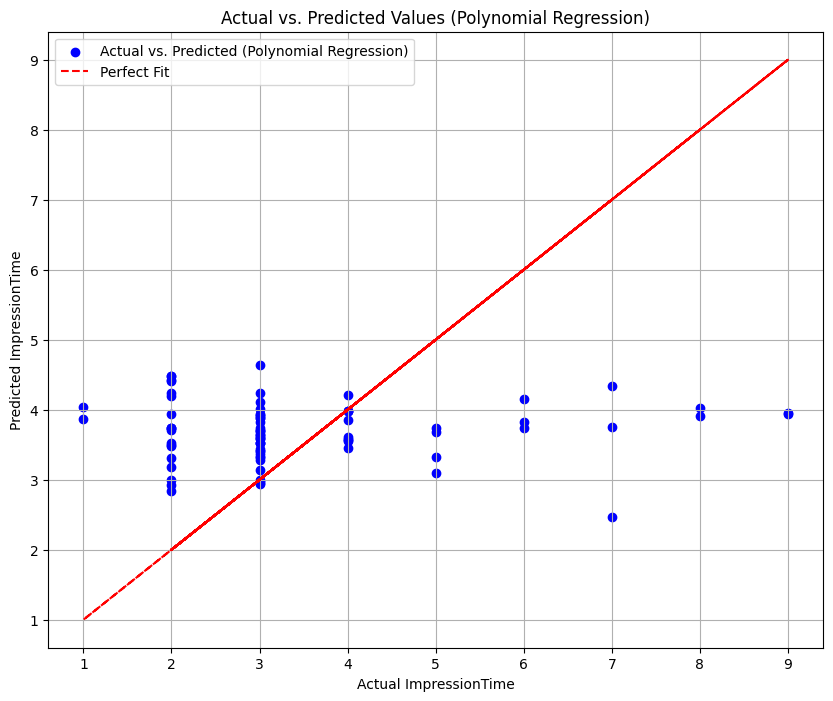

In [78]:
# Visualizing actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(ztest, Z_pred_poly, color='blue', label='Actual vs. Predicted (Polynomial Regression)')
plt.plot(ztest, ztest, color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual ImpressionTime')
plt.ylabel('Predicted ImpressionTime')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from scipy import stats

# Performing Outlier Removal and Normalization or Scaling

# Calculate Z-scores for each feature and remove rows with high Z-scores
z_scores = np.abs(stats.zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
Z_filtered = Zd[filtered_entries]

# Normalization or Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [65]:
xstrain, xstest, zstrain, zstest = train_test_split(X_scaled, Z_filtered, test_size=0.2, random_state=42)

In [67]:
deg = 3
model2 = LinearRegression()
polyreg2 = make_pipeline(PolynomialFeatures(deg), model2)

In [68]:
poly_reg.fit(xstrain, zstrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [69]:
zPred_poly2 = poly_reg.predict(xstest)

In [71]:
# Evaluating the model
mse_poly2 = mean_squared_error(zstest, zPred_poly2)
r2_poly2 = r2_score(zstest, zPred_poly2)

print("Polynomial Regression - Mean Squared Error:", mse_poly2)
print("Polynomial Regression - R^2 Score:", r2_poly2)

Polynomial Regression - Mean Squared Error: 3.1769784115927364
Polynomial Regression - R^2 Score: -0.09574594924517732


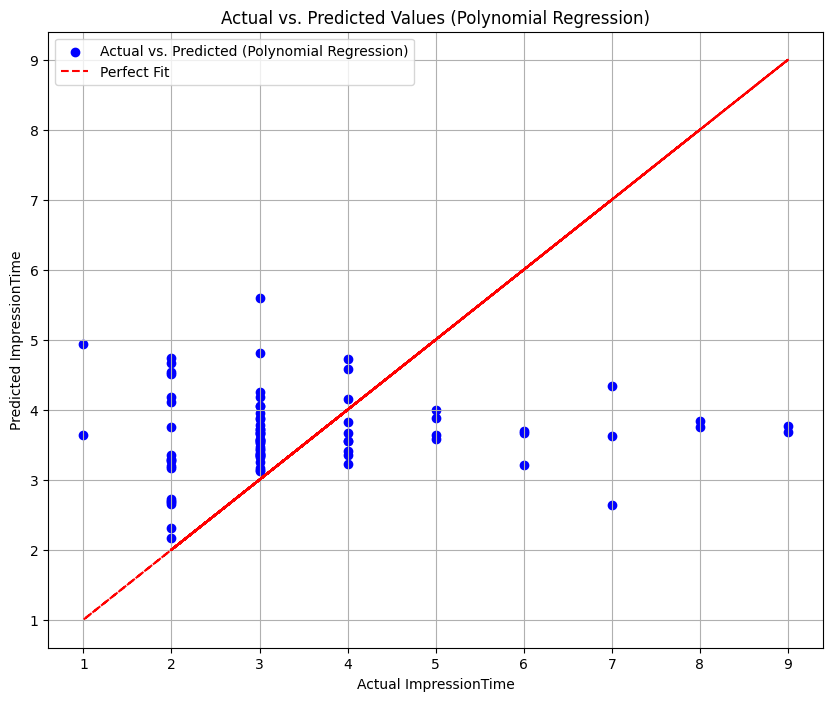

In [79]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(zstest, zPred_poly2, color='blue', label='Actual vs. Predicted (Polynomial Regression)')
plt.plot(zstest, zstest, color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual ImpressionTime')
plt.ylabel('Predicted ImpressionTime')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
print(polyreg2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])
